#Final Project
Leon Zhou 

Bin-packing problem (BBP), traditionally, refers to the kind of proplem such that given a list of items with different sizes and how to pack them into the smallest number of bins.  For this project, my main focus is on 1-D BBP. 

Note that, for this project, unlike other BBP, the bin sizes are not constrained, and the total numbe of bins is fixed.


For some parts of the project, I would mention "the paper". This is referring to the paper titled *Bin-Packing by Simulated Annealing* written by R. L Rao and S. S. Iyengar. 

Here is the link: https://www.sciencedirect.com/science/article/pii/0898122194900779

Although some of the websites and articles also helped throughout the process, I will cite them in the end.

Goals: 



*   Finish implementing the BBP described in the paper where the bins' sizes are not constrained and total number of bins are fixed

* Using the same cost function described from the paper, compare BBP Annealing algorithm with greedy algorithms. 





Start with loading some necessary packeges. 

In [0]:
import numpy as np
import random 
import itertools
import math
import copy
import matplotlib.pyplot as plt

In [0]:
pip install binpacking

  Stored in directory: /root/.cache/pip/wheels/f4/d6/cc/5bc6acd7ba75ae0e613e3ab02ef589b43d1e437d01c9e02a3c
Successfully built binpacking


In [0]:
import binpacking

Start with some experiement of the python syntax

In [0]:
random.seed(10)
items = random.choices(range(10), k=10)
items


[5, 4, 5, 2, 8, 8, 6, 1, 5, 3]

In [0]:
random.seed(10)
M = random.choices(range(3), k = 10)
M

[1, 1, 1, 0, 2, 2, 1, 0, 1, 0]

In [0]:
indexes0 = [i for i,x in enumerate(M) if x == 0]
indexes0

[3, 7, 9]

In [0]:
Bin0 = [items[3], items[7], items[9]]
Bin0

[2, 1, 3]

In [0]:
B0 = [items[j] for j in indexes0]
B0

[2, 1, 3]

In [0]:
indexes1 = [i for i,x in enumerate(M) if x == 1]
indexes1

[0, 1, 2, 6, 8]

In [0]:
Bin1 = [items[5], items[6], items[9]]
Bin1

[8, 6, 3]

In [0]:
B1 = [items[j] for j in indexes1]
B1

[5, 4, 5, 6, 5]

In [0]:
indexes2 = [i for i,x in enumerate(M) if x == 2]
indexes2

[4, 5]

In [0]:
Bin2 = [items[4], items[5]]
Bin2

[8, 8]

In [0]:
B2 = [items[j] for j in indexes2]
B2

[8, 8]

In [0]:
InitialAllocation = [Bin0, Bin1, Bin2]
InitialAllocation

[[2, 1, 3], [8, 6, 3], [8, 8]]

Pack everything into a function. 

"item" is a list of items and each number indicates the size. 

seqA: the original allocation

In [0]:

def initial(item,seqA):
  #M = 10
  #seqA = random.choices(range(M), k = 10)
  #numBins = 3  #pick number of bins
  #M = random.choices(range(numBins), k = 10) #randomly choose item distribution
  
  
  indexes0 = [i for i,x in enumerate(seqA) if x == 0]
  Bins0 = [item[j] for j in indexes0]

  indexes1 = [i for i,x in enumerate(seqA) if x == 1]
  Bins1 = [item[j] for j in indexes1]
  
  indexes2 = [i for i,x in enumerate(seqA) if x == 2]
  Bins2 = [item[j] for j in indexes2]
  
  indexes3 = [i for i,x in enumerate(seqA) if x == 3]
  Bins3 = [item[j] for j in indexes3]
  
  indexes4 = [i for i,x in enumerate(seqA) if x == 4]
  Bins4 = [item[j] for j in indexes4]
  
  indexes5 = [i for i,x in enumerate(seqA) if x == 5]
  Bins5 = [item[j] for j in indexes5]
  
  indexes6 = [i for i,x in enumerate(seqA) if x == 6]
  Bins6 = [item[j] for j in indexes6]
  
  indexes7 = [i for i,x in enumerate(seqA) if x == 7]
  Bins7 = [item[j] for j in indexes7]
  
  indexes8 = [i for i,x in enumerate(seqA) if x == 8]
  Bins8 = [item[j] for j in indexes8]
  
  
  indexes9 = [i for i,x in enumerate(seqA) if x == 9]
  Bins9 = [item[j] for j in indexes9]
  
  allocation = [Bins0, Bins1, Bins2, Bins3, Bins4, Bins5, Bins6, Bins7, Bins8, Bins9]
  return allocation
  

Generate some random items with sizes.

In [0]:
random.seed(10)
Titems = random.choices(range(100), k=90) ## randomly generate 10 items 

Titems

M: the number of bins

Generate a random initial allocation sequence

test the function.

In [229]:

M = 10
seqA = random.choices(range(M), k = 90)
print(seqA)
trial = initial(Titems,seqA)
trial

[4, 4, 4, 4, 5, 5, 4, 1, 4, 9, 4, 0, 0, 5, 0, 0, 1, 4, 9, 4, 4, 4, 5, 4, 7, 8, 6, 4, 6, 9, 1, 2, 6, 6, 6, 5, 8, 4, 8, 9, 4, 8, 7, 8, 0, 9, 7, 9, 9, 2, 6, 1, 5, 9, 1, 3, 0, 1, 2, 0, 9, 8, 4, 7, 6, 5, 4, 6, 5, 2, 3, 6, 6, 2, 6, 8, 8, 6, 0, 4, 0, 0, 2, 4, 7, 6, 2, 6, 5, 5]


[[95, 99, 86, 60, 49, 16, 43, 7, 58, 39],
 [16, 38, 94, 37, 77, 80],
 [30, 14, 94, 82, 43, 86, 91],
 [9, 77],
 [57, 42, 57, 20, 65, 52, 24, 28, 45, 68, 66, 76, 4, 6, 15, 27, 45, 44, 67],
 [81, 82, 4, 13, 54, 60, 11, 64, 60, 6],
 [61, 0, 36, 89, 31, 56, 17, 16, 48, 34, 0, 31, 52, 52],
 [98, 41, 65, 61, 24],
 [96, 43, 58, 22, 3, 24, 71, 33],
 [32, 67, 13, 84, 81, 53, 85, 11, 41]]

This is the very initial state. Or, in the other words, the initial Bin packing allocation. from the above, we see that [20, 16, 32] are in Bin0, [57, 42, 57, 65, 52] are in Bin1, and [81, 82]. I usd seed so that the output for this line is always the same, so it is easier for me to describe

Now define a cost function difined by the paper. This is the function to minimize. 

From the paper, T(hat) is the total allocation at each bin that globally minimizes the cost function. In the other words, T is the average size per Bin

In [0]:
def T(currState):
  eachBinSum = list(map(sum, currState))
  #print("individual:", eachBinSum)
  
  sumTot = sum(eachBinSum) 
  M = 10
    
  return sumTot/M
  

In [0]:

tt = initial(Titems,seqA)
tt

In [0]:
T(tt)

429.2

Next, according to the paper, define a cost function. 

In [0]:
def CostFunc(currState):
  a = np.square( sum(currState[0]) - T(currState) )
  b = np.square( sum(currState[1]) - T(currState) )
  c = np.square( sum(currState[2]) - T(currState) )
  d = np.square( sum(currState[3]) - T(currState) )
  e = np.square( sum(currState[4]) - T(currState) )
  f = np.square( sum(currState[5]) - T(currState) )
  g = np.square( sum(currState[6]) - T(currState) )
  h = np.square( sum(currState[7]) - T(currState) )
  i = np.square( sum(currState[8]) - T(currState) )
  j = np.square( sum(currState[9]) - T(currState) )
  
  return a + b + c + d + e + f + g + h + i + j

In [0]:
print("test items:", Titems)
print("test allocation sequence:", seqA)
print("bins assignment:",initial(Titems, seqA) )
print("cost:",CostFunc(tt))



test items: [57, 42, 57, 20, 81, 82, 65, 16, 52, 32, 24, 95, 99, 4, 86, 60, 38, 28, 67, 45, 68, 66, 13, 76, 98, 96, 61, 4, 0, 13, 94, 30, 36, 89, 31, 54, 43, 6, 58, 84, 15, 22, 41, 3, 49, 81, 65, 53, 85, 14, 56, 37, 60, 11, 77, 9, 16, 80, 94, 43, 41, 24, 27, 61, 17, 11, 45, 16, 64, 82, 77, 48, 34, 43, 0, 71, 33, 31, 7, 44, 58, 39, 86, 67, 24, 52, 91, 52, 60, 6]
test allocation sequence: [2, 4, 3, 7, 4, 4, 4, 4, 6, 7, 8, 4, 7, 9, 9, 7, 0, 8, 8, 0, 3, 3, 7, 6, 2, 1, 1, 0, 7, 9, 2, 7, 9, 1, 5, 4, 9, 8, 0, 2, 8, 5, 5, 8, 7, 9, 3, 0, 6, 0, 5, 8, 3, 6, 1, 1, 6, 8, 9, 0, 9, 5, 3, 3, 5, 3, 1, 8, 7, 6, 7, 9, 1, 8, 8, 3, 5, 4, 1, 4, 1, 9, 1, 6, 5, 9, 7, 3, 3, 0]
bins assignment: [[38, 45, 4, 58, 53, 14, 43, 6], [96, 61, 89, 77, 9, 45, 34, 7, 58, 86], [57, 98, 94, 84], [57, 68, 66, 65, 60, 27, 61, 11, 71, 52, 60], [42, 81, 82, 65, 16, 95, 54, 31, 44], [31, 22, 41, 56, 24, 17, 33, 24], [52, 76, 85, 11, 16, 82, 67], [20, 32, 99, 60, 13, 0, 30, 49, 64, 77, 91], [24, 28, 67, 6, 15, 3, 37, 80, 16, 43,

Then define the function to move. The paper has two types of moves:

1. randomly select 1 item t(i) from the bin which is currently located to another randomly selected bins. In the other words, select an item t from binA, delete t from binA and add t to binB 

2. randomly select two items locating in two different bins, then swap their positions.

Move1 corresponds to move assignment 1 from paper

Move2 corresponds to move 2 from paper

In [0]:
def Move1(currState): 
  OriginalState = currState.copy()  ## make a copy of the original state
  #print("original state:", OriginalState)
  #randomly select a bin j
  Len = len(currState)
  
  
  

  for s in range(100):
    J = random.randint(0,Len-1)
    if len(currState[J]) == 0: 
      continue
    else: 
      j = J
  #print("t",t)
  #print("j:",j) 
  t = random.choice(currState[j])
  currState[j].remove(t) 
  i = random.randint(0,Len-1)
  currState[i].append(t)
  #print("state", currState)  #print all the stats along the way
  #print("state",currState)
  return currState

  
  


In [0]:

tt = initial(Titems,seqA)
tt

[[38, 45, 4, 58, 53, 14, 43, 6],
 [96, 61, 89, 77, 9, 45, 34, 7, 58, 86],
 [57, 98, 94, 84],
 [57, 68, 66, 65, 60, 27, 61, 11, 71, 52, 60],
 [42, 81, 82, 65, 16, 95, 54, 31, 44],
 [31, 22, 41, 56, 24, 17, 33, 24],
 [52, 76, 85, 11, 16, 82, 67],
 [20, 32, 99, 60, 13, 0, 30, 49, 64, 77, 91],
 [24, 28, 67, 6, 15, 3, 37, 80, 16, 43, 0],
 [4, 86, 13, 36, 43, 81, 94, 41, 48, 39, 52]]

Below is the line to test whether the Move1 function will work or not. If, for instance, there is something wrong with the for loop above. Python will give an error message saying "can not choose from an empty list"

For the code below, it is a good idea to test with large range. I have tested with 10000+, and there was no erro messages. For the purposr of illustrating, I only picked range(100)

In [0]:
[Move1(tt) for _ in range(100)] 

2 different ways to test whether it is an emoty list or not. 

In [0]:
len(tt[3]) == 0

False

In [0]:
tt[4] == []

False

Then, define another move described from paper. 

This is called doMove2. The move assignment as follows: 

randomly pick two items currently locating at two different bins, then switch their positions. 

In [0]:
def Move2(currState): 
  OriginalState = currState.copy()  ## make a copy of the original state
  #print("original state:", OriginalState)
  
  for _ in range(100): 
    J = random.randint(0,len(currState)-1)
    
    if len(currState[J]) == 0: 
      continue
    else:
      j = J
  for _ in range(100):
    I = random.randint(0,len(currState)-1)
    if len(currState[I]) ==0:
      continue
    else:
      i = I
  #randomly select an item a from binj
  #q is the position of item that is been chosen in binj
  Lenj = len(currState[j])
  q = random.randint(0,(Lenj-1)  )
  #print("from binj pick:", currState[j][a])
  
  #randomly select an item a from bini
  #p is the position that is been chosen in bini
  Leni = len(currState[i])
  p = random.randint(0,(Leni-1) )
  #print("from bini pick:",currState[i][b])
  
  #swap those two items
  currState[j][q], currState[i][p] = currState[i][p], currState[j][q]
  
  
  return currState

Below is a line to check whether the function works or not. If Move2 is the only move assignment, I do not worry about empty list at all since it is swapping items from different bins so each bin at least should have 1 item. However, according the paper, if the tempreture is high, use move 1, and if tempreture is low, use move 2. Thus, it is very likely after move 1, there will be some empty list, so it is a good idea to try to avoid picking items from empty lsit. 

In [0]:
[Move2(tt) for _ in range(1000)]

Then, make a function to propose a move. Move1 and Move2 have equal probability to be chosen

#Simulated Annealing 

This part contains code for simulated annealing

In [0]:

def doMove(currState, sig2):
  OriginalState = copy.deepcopy(currState)
  
  # propose a move
  if sig2 >= 0.65:
    proposalMove = Move1(currState)
  else:
    proposalMove = Move2(currState)
  #print("sig2:", sig2)
  #print("prop Move", proposalMove)
  # get the function value difference
  dFunc = CostFunc(proposalMove) - CostFunc(currState) #the difference between new cost and old cost
  #print("df:", dFunc)
  

  rho = 1
  if dFunc > 0:
    rho = math.exp(-dFunc/sig2)

  rand = random.random()
  if rand < rho:
    return proposalMove
  #print("currMatrix:", OriginalM)
  # otherwise, no transition
  return OriginalState

In [0]:
tt = initial(Titems,seqA)
tt

[[38, 45, 4, 58, 53, 14, 43, 6],
 [96, 61, 89, 77, 9, 45, 34, 7, 58, 86],
 [57, 98, 94, 84],
 [57, 68, 66, 65, 60, 27, 61, 11, 71, 52, 60],
 [42, 81, 82, 65, 16, 95, 54, 31, 44],
 [31, 22, 41, 56, 24, 17, 33, 24],
 [52, 76, 85, 11, 16, 82, 67],
 [20, 32, 99, 60, 13, 0, 30, 49, 64, 77, 91],
 [24, 28, 67, 6, 15, 3, 37, 80, 16, 43, 0],
 [4, 86, 13, 36, 43, 81, 94, 41, 48, 39, 52]]

Test function with large range.

In [0]:
[doMove(tt, 0.9) for _ in range(1000)]

In [0]:
def BPP(numSteps):

  # choose a random starting state
  TestItems = random.choices(range(100), k=100) ## randomly generate k number items items 
  M = 10
  seqA1 = random.choices(range(M), k = 100)

  currState = initial(TestItems, seqA1)


  original = copy.deepcopy(currState)
  #print("starting state:", original)

  sig2 = 1
  decFac = 0.95

  for i in range(numSteps):
    state = doMove(currState, sig2)  ## update the doMove function
  
  # slowly decrease sig2
    sig2 = sig2*decFac
  
# done! print some results
  #print("final sig2:", sig2)
  
  print("initial weight,", CostFunc(original))
  print("final weight:", CostFunc(state))
  print("diff:", CostFunc(original) - CostFunc(state))
  print("state",state)
  return CostFunc(state)

In [227]:
BPP(1000)

initial weight, 441252.10000000003
final weight: 95086.10000000002
diff: 346166.0
state [[70, 58, 67, 9, 83, 30, 13, 5, 16, 4, 86, 72], [14, 92, 47, 37, 5, 24, 52, 27, 73, 48, 7, 95, 84, 20, 81], [29, 76, 10, 80, 29, 58, 61], [89, 73, 75, 3, 39, 45, 74, 94], [69, 0, 2, 12, 97, 49, 53, 30, 1, 37, 27, 45, 78, 99], [39, 14, 59, 4, 59, 72, 53, 35, 99, 62, 10], [43, 3, 71, 37, 49, 89, 94, 6, 29, 84], [67, 94, 71, 27, 85, 79], [85, 12, 37, 57, 94, 68, 73, 62, 35], [17, 83, 96, 76, 35, 86, 0, 0]]


95086.10000000002

In [0]:
diffList = [BPP(1000) for _ in range(100)]
sum(diffList)/100

346295.902

Above is the average cost for 100 cost values.

#Best choice of tempreture cutoff

For the tempreture's cutoff sig2. What is the best value? Below is the section discussing this.

Same move and annealing function as before, but this time, take sig2 cuttoff i as an input.

In [0]:
def doMove1(currState, sig2, i):
  OriginalState = copy.deepcopy(currState)
  
  # propose a move
  if sig2 >= i:
    proposalMove = Move1(currState)
  else:
    proposalMove = Move2(currState)
  #print("sig2:", sig2)
  #print("prop Move", proposalMove)
  # get the function value difference
  dFunc = CostFunc(proposalMove) - CostFunc(currState) #the difference between new cost and old cost
  #print("df:", dFunc)
  

  rho = 1
  if dFunc > 0:
    rho = math.exp(-dFunc/sig2)

  rand = random.random()
  if rand < rho:
    return proposalMove
  #print("currMatrix:", OriginalM)
  # otherwise, no transition
  return OriginalState

In [0]:
def BPP1(numSteps,i):

  # choose a random starting state
  TestItems = random.choices(range(100), k=100) ## randomly generate k number items items 
  M = 10
  seqA1 = random.choices(range(M), k = 100)

  currState = initial(TestItems, seqA1)


  original = copy.deepcopy(currState)
  #print("starting state:", original)

  sig2 = 1
  decFac = 0.95

  for i in range(numSteps):
    state = doMove1(currState, sig2,i)  ## update the doMove function
  
  # slowly decrease sig2
    sig2 = sig2*decFac
  
# done! print some results
  #print("final sig2:", sig2)
  
  #print("initial weight,", CostFunc(original))
  #print("final weight:", CostFunc(state))
  #print("diff:", CostFunc(original) - CostFunc(state))
  return  CostFunc(state)

Creat a list of possible values for i.

In [0]:
iList = np.linspace(0.5,0.9,10)
iList.tolist()


[0.5,
 0.5444444444444444,
 0.5888888888888889,
 0.6333333333333333,
 0.6777777777777778,
 0.7222222222222222,
 0.7666666666666666,
 0.8111111111111111,
 0.8555555555555556,
 0.9]

Map each value of i into the function. Return is a list of costs with correspond i value. We want the lowest one

In [0]:
vals = [BPP1(1000, i) for i in iList]
vals

[401924.0,
 247328.0,
 226214.90000000002,
 491968.4,
 130016.09999999998,
 263406.1,
 183602.90000000002,
 261858.10000000003,
 335456.5,
 403382.39999999997]

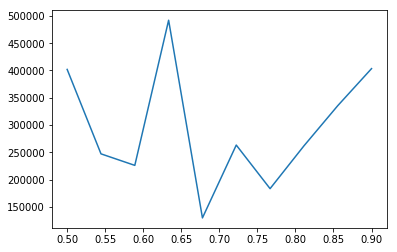

In [0]:
plt.plot(iList,vals)

Since each time run the simulation, the plot looks different. I run the simulation several time, adn the lowest values often occur around 0.65 and 0.7

# Comparison with Greedy algorithm

In [0]:
def greedy(numstep):
  for _ in range(numstep):

    b = random.choices(range(100), k=100)
    bins = binpacking.to_constant_bin_number(b,10) # 10 being the bin volume
  return CostFunc(bins)

In [0]:
greedList = [greedy(1000) for _ in range(100)]
(sum(greedList))/100

45.525000000000006

Above, is the average cost of 100 cost values. 

When compare my simulated annealing and the greedy algorithm, greedy algorithm outperformed me a lot, which suggests a lot of improvement for my implementation of simulated annealing for solving BBP 

#Limitation and Discussion

There are several limitation of this project


*   For the function T and the CostFunction, instead of calculate the cost for each bin manually, it might be more efficient to use a loop.

*   It was a challange and somewhat dificult to avoid empty bins especially for Move1, since it is more likely to pick the same bin and delete items from that bin. In this case,Python will give an error message because it can not delete items from an already empty lsit. 

*   For the annealing part BPP function, the run time is very long if the numSteps is big. 

*   For DoMove function, when testing different cutoff value for sig2 and choice of move assignment, it usually takes a long time to run the code esecially for the last part. 


*   For both two moves functions, I did not difine i and j has to be the same. Thus, it is very likely that during the annealing process, it occurs that bin i and bin j are the same bin, which in this case, nothing happens.


Discussion:


*   During this project, I came to realize the importance of making each individual small function efficient, becuase if individual functions has redundency or not efficient, it will create a snowball effect and cause the overall function not efficient. 

*   There are certainly a lot of improvement I can make for this project:


        1.   As professor Wright suggested, maybe using np.array is a more efficient idea since I will have more control over my list or list of lists
         2. Improve the code where I calculate the cost function. 
         3. Improve both of my move assignments. 
         4. The choice of i is still ambiguous. So, it is maybe a good idea to run more simulation.










#Reference:

1. https://pypi.org/project/binpacking/


2. https://pdfs.semanticscholar.org/4608/f125f34da502e7a4dbe679b87e38de5071fb.pdf


3. 
https://stackoverflow.com/questions/23200121/simulated-annealing-algorithm-to-solve-bin-packing
